# chicago-regions-map

By [Ben Welsh](https://palewi.re/who-is-ben-welsh/)

This notebook creates a regional map of Chicago by combining several government sources to generate a [GeoJSON map file](https://github.com/palewire/chicago-regions-map/blob/main/output/regions.geojson) that isn't otherwise available on the city's data portal.

## Sources

- [City of Chicago Regions](https://www.chicago.gov/dam/city/depts/cdph/policy_planning/PP_PlanningRegions101810.pdf)
- [City of Chicago Community Areas](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6)

Import Python tools.

In [1]:
import pandas as pd
import geopandas as gpd

Read in the crosswalk of community ids to regions.

In [2]:
regions_df = pd.read_csv("input/regions.csv", dtype={"id": str})

Read in the GeoJSON of communities from the city data portal.

In [3]:
communities_gdf = gpd.read_file("https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=GeoJSON")

Trim down the data portal file.

In [4]:
trimmed_gdf = communities_gdf[[
    'area_numbe',
    'community',
    'geometry'
]].rename(columns={
    "area_numbe": "id"
})

Merge the two dataframes.

In [5]:
merged_gdf = trimmed_gdf.merge(
    regions_df,
    on="id",
    how="inner"
)

Make sure nothing was dropped.

In [6]:
assert len(merged_gdf) == len(regions_df) == len(trimmed_gdf)

Dissolve by region.

In [7]:
regions_gdf = merged_gdf.dissolve(by='region').reset_index().drop(["community", "id"], axis=1)

Map the results.

<AxesSubplot:>

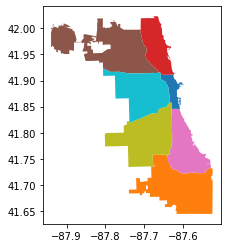

In [8]:
regions_gdf.plot(column='region')

Save to a GeoJSON file.

In [9]:
regions_gdf.to_file("output/regions.geojson", driver="GeoJSON")